In [125]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
city_data.head()
# Combine the data into a single dataset
data = pd.merge(city_data, ride_data, on = 'city')
city_groups = data.groupby(['city', 'type'])['driver_count','fare'].agg({'driver_count': ['mean'], 'fare': ['mean','count']})
#city_groups
# Display the data table for preview
data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [129]:
#data = data.sort_values(['type'], ascending = False)
df_city_groups = pd.DataFrame(city_groups)
df_city_groups.columns = ['Number of Drivers', 'Average Fare', 'Total Number of Rides']
#df_city_groups = df_city_groups.rename(columns = {'mean': "Average Fare", 'count': 'Total Number of Rides'})
#df_city_groups.set_index(['type'])
df_city_groups = df_city_groups.reset_index(level = ['type'])
df_city_groups

,type,Number of Drivers,Average Fare,Total Number of Rides
city,,,,
Amandaburgh,Urban,12,24.641667,18
Barajasview,Urban,26,25.332273,22
Barronchester,Suburban,11,36.422500,16
Bethanyland,Suburban,22,32.956111,18
Bradshawfurt,Rural,7,40.064000,10
Brandonfort,Suburban,10,35.437368,19
Carriemouth,Urban,52,28.314444,27
Christopherfurt,Urban,41,24.501852,27
Colemanland,Suburban,23,30.894545,22


## Bubble Plot of Ride Sharing Data

In [130]:
# Obtain the x and y coordinates for each of the three city types
rural_group = df_city_groups.loc[df_city_groups['type'] == 'Rural', ['Average Fare', 'Total Number of Rides', 'Number of Drivers']]

urban_group = df_city_groups.loc[df_city_groups['type'] == 'Urban', ['Average Fare', 'Total Number of Rides', 'Number of Drivers']]

suburban_group = df_city_groups.loc[df_city_groups['type'] == 'Suburban', ['Average Fare', 'Total Number of Rides', 'Number of Drivers']]

rural_group.head()

,Average Fare,Total Number of Rides,Number of Drivers
city,,,
Bradshawfurt,40.064000,10,7
Garzaport,24.123333,3,7
Harringtonfort,33.470000,6,4
Jessicaport,36.013333,6,1
Lake Jamie,34.358333,6,4


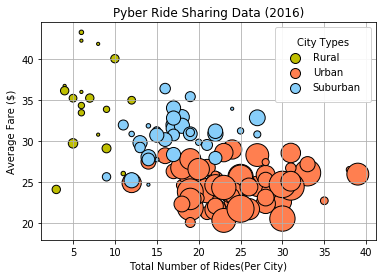

<Figure size 432x288 with 0 Axes>

In [153]:
# Build the scatter plots for each city types
fig, ax1 = plt.subplots()

ax1.scatter(rural_group['Total Number of Rides'], rural_group['Average Fare'], s = rural_group['Number of Drivers']*10,facecolor = 'y', edgecolors = 'black', label = 'Rural')

ax1.scatter(urban_group['Total Number of Rides'], urban_group['Average Fare'],s = urban_group['Number of Drivers']*10, facecolor = 'coral', edgecolors = 'black', label = 'Urban')

ax1.scatter(suburban_group['Total Number of Rides'], suburban_group['Average Fare'], s = suburban_group['Number of Drivers']*10, facecolor = 'lightskyblue', edgecolors = 'black', label = 'Suburban')
ax1.set_xlabel('Total Number of Rides(Per City)')
ax1.set_ylabel('Average Fare ($)')
ax1.set_title('Pyber Ride Sharing Data (2016)')
#ax1.legend(loc = 'best', title = 'City Types')
ax1.grid()

lgd = ax1.legend(numpoints=1, loc = 'best', borderpad=1, frameon=True, framealpha=0.9, title="City Types")
for handle in lgd.legendHandles:
    handle.set_sizes([100.0])
plt.show()
plt.savefig("../Images/Pyber_Ride_Sharing_Data(2016).png")


## Total Fares by City Type

4327.93
39854.380000000005


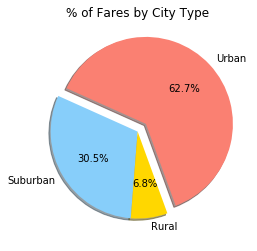

<Figure size 432x288 with 0 Axes>

In [211]:
rural_fares = []
for x in range(0, len(rural_group['Average Fare'])):
    rural_fares.append(rural_group.iloc[x, 0]*rural_group.iloc[x, 1])
total_rural_fares = sum(rural_fares)
print(total_rural_fares)

urban_fares = []
for x in range(0, len(urban_group['Average Fare'])):
    urban_fares.append(urban_group.iloc[x, 0]*urban_group.iloc[x, 1])
total_urban_fares = sum(urban_fares)
print(total_urban_fares)

suburban_fares = []
for x in range(0, len(suburban_group['Average Fare'])):
    suburban_fares.append(suburban_group.iloc[x, 0]*suburban_group.iloc[x, 1])
total_suburban_fares = sum(suburban_fares)

plt.pie([total_urban_fares, total_suburban_fares, total_rural_fares], explode = [0.13,0,0], labels = ['Urban', 'Suburban', 'Rural'], autopct="%1.1f%%", shadow=True, startangle=290, colors = ['salmon', 'lightskyblue', 'gold'])
plt.title('% of Fares by City Type')
plt.show()
plt.savefig('../Images/Total_Fares.png')

## Total Rides by City Type

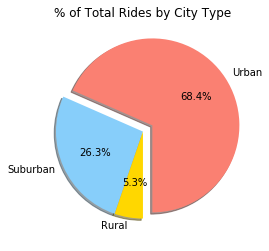

In [222]:
# Calculate Type Percents
data['type'].value_counts().index
total_rides = []
for city_type, x in zip(data['type'].value_counts().index, range(0, len(data['type'].value_counts()))):
    total_rides.append(data['type'].value_counts()[x])
# Build Pie Chart
plt.pie(total_rides, explode = [0.13,0,0], labels = ['Urban', 'Suburban', 'Rural'], autopct="%1.1f%%", shadow=True, startangle=270, colors = ['salmon', 'lightskyblue', 'gold'])
plt.title('% of Total Rides by City Type')
# Save Figure
plt.savefig('../Images/Total_Rides.png')
plt.show()

## Total Drivers by City Type

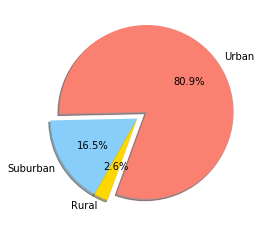

In [223]:
rural_drivers = rural_group['Number of Drivers'].sum()
urban_drivers = urban_group['Number of Drivers'].sum()
suburban_drivers = suburban_group['Number of Drivers'].sum()

plt.pie([urban_drivers,suburban_drivers,rural_drivers], explode = [0.13,0,0], labels = ['Urban', 'Suburban', 'Rural'], autopct="%1.1f%%", shadow=True, startangle=250, colors = ['salmon', 'lightskyblue', 'gold'])
plt.savefig('../Images/Total_Drivers.png')
plt.show()